In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df = pd.read_csv('data.csv')

In [27]:
# Add a new column 'PRICE' to the DataFrame using the 'TARGET' variable values
df['target'] = df['MEDV']

# # Drop the 'TARGET' column
df.drop(columns=['MEDV'], inplace=True)

In [28]:
# check for missing values
print(df.isnull().sum())

# drop rows with missing values
df.dropna(inplace=True)

# fill missing values with mean
df.fillna(df.mean(), inplace=True)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64


In [29]:
# check for duplicates
print(df.duplicated().sum())

# drop duplicates
df.drop_duplicates(inplace=True)

0


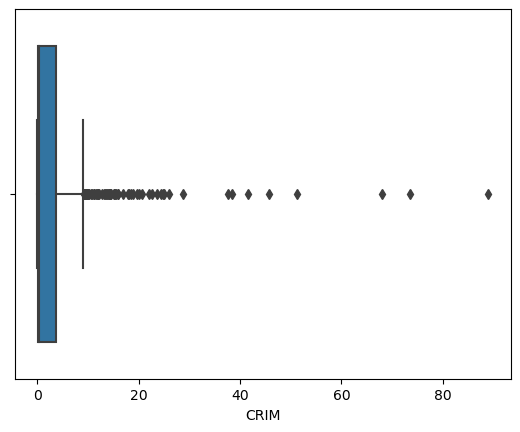

In [30]:
# identify outliers using boxplot
sns.boxplot(x=df['CRIM'])

# remove outliers using z-score
from scipy import stats
z_scores = stats.zscore(df['CRIM'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

In [31]:
# # drop irrelevant features
# df = df.drop(['CHAS'], axis=1)

In [32]:
# add a categorical feature as an example
df['CHAS'] = pd.Categorical.from_codes(df['CHAS'], ['no', 'yes'])

# use one-hot encoding to convert the categorical feature to numerical
df = pd.get_dummies(df, columns=['CHAS'])

In [33]:
from sklearn.preprocessing import StandardScaler
X = df.drop('target', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 505
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      498 non-null    float64
 1   ZN        498 non-null    float64
 2   INDUS     498 non-null    float64
 3   NOX       498 non-null    float64
 4   RM        498 non-null    float64
 5   AGE       498 non-null    float64
 6   DIS       498 non-null    float64
 7   RAD       498 non-null    int64  
 8   TAX       498 non-null    int64  
 9   PTRATIO   498 non-null    float64
 10  B         498 non-null    float64
 11  LSTAT     498 non-null    float64
 12  target    498 non-null    float64
 13  CHAS_no   498 non-null    uint8  
 14  CHAS_yes  498 non-null    uint8  
dtypes: float64(11), int64(2), uint8(2)
memory usage: 55.4 KB


In [35]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,CHAS_no,CHAS_yes
count,498.000000,498.000000,498.00000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,2.778287,11.546185,11.02492,0.552766,6.293082,68.158434,3.830554,9.317269,404.096386,18.427510,359.121867,12.494096,22.753012,0.929719,0.070281
std,5.088265,23.464449,6.85777,0.115729,0.700201,28.162623,2.103572,8.580296,166.659277,2.170867,87.140830,7.007974,9.094994,0.255877,0.255877
min,0.006320,0.000000,0.46000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.600000,0.000000,0.000000
25%,0.080573,0.000000,5.13000,0.448250,5.888250,43.875000,2.113700,4.000000,279.000000,17.075000,376.057500,6.905000,17.225000,1.000000,0.000000
50%,0.247510,0.000000,8.56000,0.535000,6.211000,76.700000,3.272100,5.000000,330.000000,18.950000,391.600000,11.265000,21.400000,1.000000,0.000000
75%,3.103700,12.500000,18.10000,0.624000,6.628000,93.875000,5.214600,8.000000,666.000000,20.200000,396.225000,16.635000,25.000000,1.000000,0.000000
max,28.655800,100.000000,27.74000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000,1.000000


In [36]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target', 'CHAS_no', 'CHAS_yes'],
      dtype='object')

<AxesSubplot:>

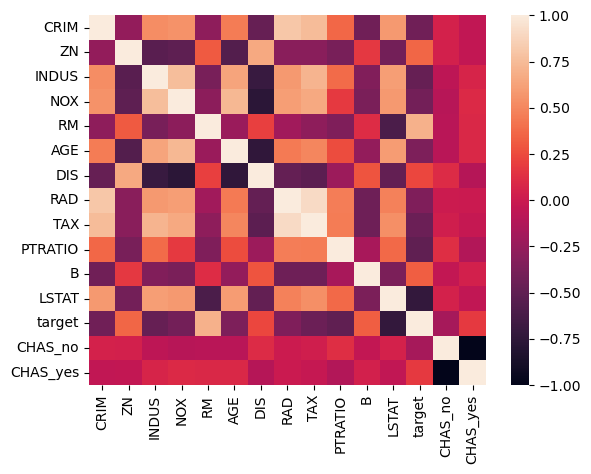

In [37]:
sns.heatmap(df.corr())

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop('target', axis=1)
y = df['target']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [46]:
print("Mean squared error: {:.2f}".format(mse))
print("Root mean squared error: {:.2f}".format(rmse))
print("R^2 score: {:.2f}".format(r2))

Mean squared error: 17.19
Root mean squared error: 4.15
R^2 score: 0.76


In [47]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

     Feature  Coefficient
0       CRIM    -0.136138
1         ZN     0.030043
2      INDUS     0.026875
3        NOX   -16.774256
4         RM     3.821473
5        AGE    -0.005849
6        DIS    -1.460729
7        RAD     0.264838
8        TAX    -0.009716
9    PTRATIO    -1.007075
10         B     0.011666
11     LSTAT    -0.553702
12   CHAS_no    -1.059490
13  CHAS_yes     1.059490


In [48]:
print("Intercept: {:.2f}".format(model.intercept_))

Intercept: 37.33


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif)